
#1,set.sys

#2,读取数据

 df
      open  high   low  close   volume   avg  ma_2  ma_3  ma_5  ma_10   ...    xmonth  xday  xday_week  xday_year  xweek_year     y  price  price_next  price_change  y_pred
3065 3.280 3.290 3.270  3.290   858158 3.280 3.280 3.280 3.280  3.310   ...         1     1          3          1           0 3.310  3.280       3.310       100.915  -0.945
3066 3.310 3.310 3.270  3.290  1654384 3.290 3.290 3.280 3.280  3.310   ...         1     1          3          1           0 3.310  3.290       3.310       100.608  -4.562
3067 3.320 3.320 3.300  3.310  1210668 3.310 3.300 3.290 3.290  3.300   ...         1     1          3          1           0 3.310  3.310       3.310       100.000  -2.540
3068 3.310 3.320 3.300  3.320   940023 3.310 3.310 3.310 3.290  3.300   ...         1     1          3          1           0 3.300  3.310       3.300        99.698  -1.304
3069 3.290 3.320 3.280  3.320  1136877 3.300 3.310 3.310 3.300  3.290   ...         1     1          3       

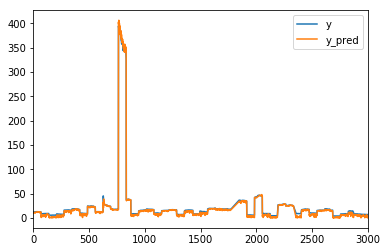

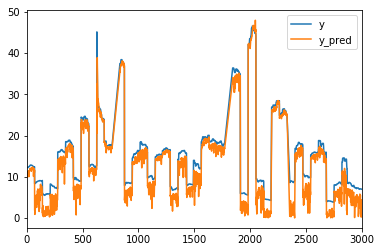

In [2]:
# -*- coding: utf-8 -*-
'''
TopQuant-简称TQ极宽智能量化回溯分析系统，培训课件-配套教学python课件程序

Top极宽量化(原zw量化)，Python量化第一品牌 
by Top极宽·量化开源团队 2017.10.1 首发

网站： www.TopQuant.vip      www.ziwang.com
QQ群: Top极宽量化1群，124134140
      Top极宽量化2群，650924099
      Top极宽量化3群，450853713
  
'''
#1
import os,arrow
import pandas as pd
import numpy as np
#2
import keras
from keras import initializers,models,layers
from keras.models import Sequential
from keras.layers import Flatten,Dense, Input, Dropout, Embedding,SimpleRNN,Bidirectional,LSTM,Conv1D, GlobalMaxPooling1D,Activation,MaxPooling1D,GlobalAveragePooling1D
from keras.optimizers import RMSprop
from keras.utils import plot_model

#3
import tensorlayer as tl
import tensorflow as tf

#4
import zsys
import ztools as zt
import ztools_str as zstr
import ztools_data as zdat
import ztools_draw as zdr
import ztools_tq as ztq
import zpd_talib as zta
#
import zai_keras as zks
%matplotlib inline
#
#------------------------------------

#1
print('\n#1,set.sys')
pd.set_option('display.width', 450)    
pd.set_option('display.float_format', zt.xfloat3)    

#2
print('\n#2,读取数据')
fss='data/df_mlp010.csv'
df=pd.read_csv(fss)
zt.prx('df',df.tail())
#

#3 清理掉负数
print('\n#3 整理数据')
df2=df[df.y_pred>0]
zt.prx('df2',df2.tail())
print('\ndf.num,',len(df.index))
print('\ndf2.num,',len(df2.index))

#4 
print('\n#4 acc准确度分析')
print('\nky0=10')
dacc,dfx,a10=ztq.ai_acc_xed2ext(df2.y,df2.y_pred,ky0=10,fgDebug=True)

print('\nky0=5')
dacc,dfx,a10=ztq.ai_acc_xed2ext(df2.y,df2.y_pred,ky0=5,fgDebug=True)

#5 
print('\n#5 图形分析')
df2[['y','y_pred']].plot()
#
df3=df2[df2.y<100]
df3[['y','y_pred']].plot()


